# Predicting survival on the Titanic shipwreck

## 1. Problem definition

>Given passenger's features, can we predict whether or not they survived the sinking of the Titanic.?

## 2. Data

The data came from Kaggle : https://www.kaggle.com/competitions/titanic/data

## 3. Evaluation

The score is the percentage of passengers you correctly predict. This is known as **accuracy**.

## 4. Features


* survival: Survival	0 = No, 1 = Yes
* pclass : Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	Sex	
* Age	:Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	 

 -The dataset defines family relations in this way...
 
 -Sibling = brother, sister, stepbrother, stepsister
 
 -Spouse = husband, wife (mistresses and fiancés were ignored)

* parch :	# of parents / children aboard the Titanic.	

 -The dataset defines family relations in this way...
 
 -Parent = mother, father
 
 -Child = daughter, son, stepdaughter, stepson
 
 -Some children travelled only with a nanny, therefore parch=0 for them.
 
* ticket :	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

## Loading data


In [7]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_tmp = df.copy()

In [9]:
df_tmp.drop("Name", axis=1, inplace=True)

In [10]:
df_tmp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_tmp.shape

(891, 11)

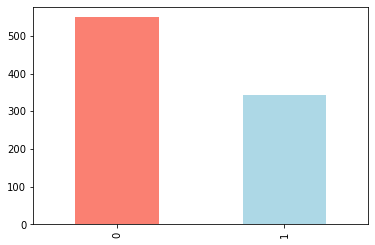

In [15]:
df_tmp.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
pd.crosstab(df_tmp.Sex, df_tmp.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


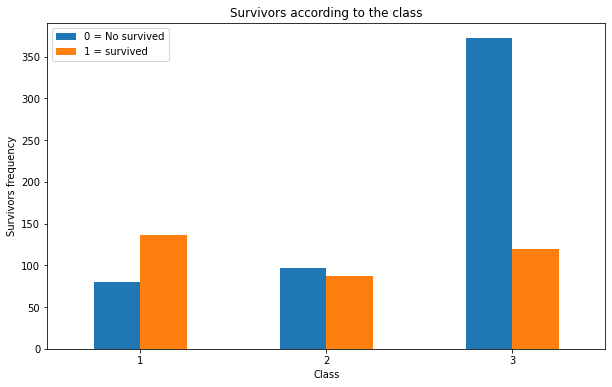

In [23]:
pd.crosstab(df_tmp.Pclass, df_tmp.Survived).plot(kind="bar", figsize=(10,6))

plt.title("Survivors according to the class")
plt.xlabel("Class")
plt.ylabel("Survivors frequency")
plt.legend(["0 = No survived", "1 = survived"])
plt.xticks(rotation=0);

In [24]:
df.Sex.dtypes

dtype('O')

<AxesSubplot:ylabel='Frequency'>

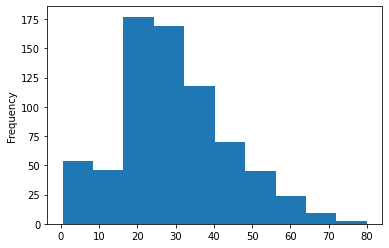

In [26]:
df_tmp.Age.plot.hist()

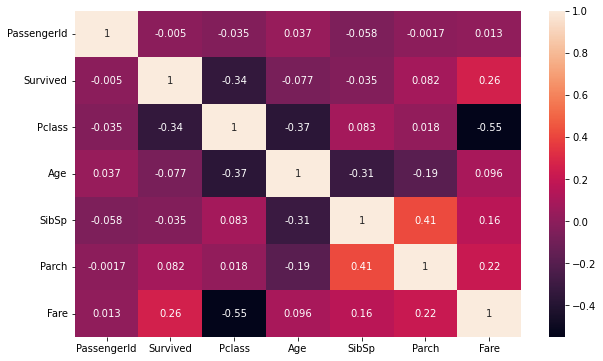

In [39]:
corr_matrix = df_tmp.corr()

fig ,ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(
    corr_matrix,
    annot=True, 
)

## Transform Data

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [52]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [53]:
  # check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


In [54]:
df_tmp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
def preprocess_data(df):
    """
    Performs transformations on df and return transformed it
    """
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                # df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with mean
                df[label] = content.fillna(content.mean())
            
                
    # Filled categorical missing data and turn categories into numbers
  
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column which tells us if the data was missing
            #df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1

            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [56]:
df_tmp = preprocess_data(df_tmp)

In [57]:
df_tmp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,22.0,1,0,524,7.2500,0,3
1,2,1,1,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,1,26.0,0,0,670,7.9250,0,3
3,4,1,1,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,2,35.0,0,0,473,8.0500,0,3


In [58]:
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [59]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int16  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int16  
 10  Embarked     891 non-null    int8   
dtypes: float64(2), int16(2), int64(5), int8(2)
memory usage: 54.1 KB


## Modelling

In [61]:
# Split data
X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

In [62]:
# Split data in train and valid sets
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random Forest Classifier

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different Scikit-Learn ml models
    X_train : training data (no labels)
    X_val : validation data (no labels)
    y_train : training labels
    y_val : validation labels
    """
    # set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # FIt the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [64]:
model_scores = fit_and_score(models, X_train, X_val,y_train, y_val)
model_scores

/home/ewins/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7541899441340782,
 'KNN': 0.6759776536312849,
 'Random Forest': 0.8268156424581006}

## Hyperparameter tuning with RandomizedSearchCV

In [65]:
rf_grid = {
    "n_estimators": [10,1000,50],
    "max_depth": [None, 3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [66]:
np.random.seed(42)

rs_rf_model = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5, n_iter=20,
                                verbose=True)

rs_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 1000, 50]},
                   verbose=True)

In [67]:
rs_rf_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [68]:
rs_rf_model.score(X_val,y_val)

0.8268156424581006

In [71]:
gs_rf_grid = {
    "n_estimators": [10,500,50],
    "max_depth": [3,5,10],
    "min_samples_split":np.arange(2,20,4),
    "min_samples_leaf": np.arange(1,20,2)
}

In [72]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid=gs_rf_grid,
                    cv=5,
                    verbose=True)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': [10, 500, 50]},
             verbose=True)

In [73]:
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [74]:
gs_rf.score(X_val, y_val)

0.8212290502793296

In [116]:
model = RandomForestClassifier(n_estimators=50,
                              max_depth=10,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [117]:
model.score(X_val,y_val)

0.8212290502793296

In [109]:
y_preds = model.predict(X_val)

In [110]:
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

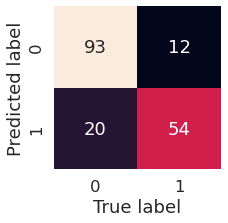

In [111]:
plot_conf_mat(y_val, y_preds)

In [88]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [89]:
df_test = pd.read_csv("data/test.csv")

In [90]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
df_test.shape

(418, 11)

In [92]:
df_test_tmp = df_test.copy()

In [93]:
df_test_tmp.drop("Name", axis=1, inplace=True)

In [94]:
df_test_tmp = preprocess_data(df_test_tmp)

In [95]:
df_test_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int8   
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    int16  
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    int8   
 9   Embarked     418 non-null    int8   
dtypes: float64(2), int16(1), int64(4), int8(3)
memory usage: 21.8 KB


In [96]:
X_train.shape

(712, 10)

In [97]:
df_test_tmp.shape

(418, 10)

In [112]:
test_preds = model.predict(df_test_tmp)

In [113]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [114]:
# Format predictions into the same format Kaggle is asking for

df_preds = pd.DataFrame()
df_preds["PassengerId"] = df_test_tmp["PassengerId"]
df_preds["Survived"] = test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
df_preds.to_csv("data/test_predictions.csv", index= False)

In [102]:
model.feature_importances_

array([0.13048416, 0.06103725, 0.24913701, 0.12653548, 0.03466222,
       0.02454935, 0.16246767, 0.13302207, 0.05470897, 0.02339583])

In [103]:
def plot_features(columns, importance, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importance})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_importance");

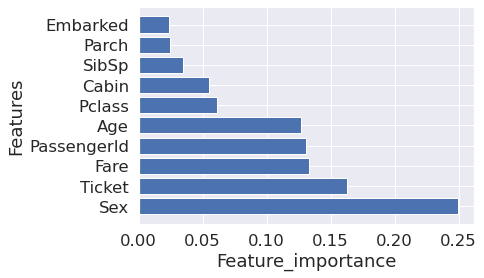

In [104]:
plot_features(X_train.columns, model.feature_importances_)